In [57]:
import os
import json
import pandas as pd
import numpy as np

In [58]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# !pip install nbconvert
# !jupyter nbconvert --to html program.ipynb

In [113]:
td_df.head(100).to_csv("RoadSafety_temp.TelematicDevices.csv", index=False)

In [60]:
td_df = pd.read_csv("RoadSafety_temp.TelematicDevices.csv")
wr_df = pd.read_csv("RoadSafety_temp.Weather.csv")
sl_df = pd.read_csv("RoadSafety_temp.Speed_Limit.csv")

/tmp/ipython-input-792936948.py:1: DtypeWarning: Columns (33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  td_df = pd.read_csv("/content/drive/MyDrive/RoadSafety_temp.TelematicDevices.csv")


In [61]:
td_df.columns

Index(['_id', 'id', 'time_collected', 'priority', 'sat', 'event', 'ignition',
       'motion', 'gpsStatus', 'batteryLevel', 'idle', 'power', 'operator',
       'distance', 'totalDistance', 'battery', 'hours', 'idleHours',
       'geofenceIds', 'originalName', 'deviceId', 'type', 'protocol',
       'serverTime', 'deviceTime', 'fixTime', 'outdated', 'valid', 'latitude',
       'longitude', 'altitude', 'speed', 'course', 'address', 'accuracy',
       'network', 'ignitionStateChange', 'speedLimit', 'axisX', 'axisY',
       'axisZ', 'alarm', 'io260'],
      dtype='object')

In [62]:
ignore_columns = ['_id', 'time_collected', 'time', 'year',
       'month', 'day', 'hour', 'adjusted_latitude', 'adjusted_longitude']

columns_to_check = [col for col in td_df.columns if col not in ignore_columns]

td_df_cleaned = td_df.drop_duplicates(subset=columns_to_check)

td_df_cleaned.reset_index(drop=True, inplace=True)

In [63]:
td_df_cleaned_filtered = td_df_cleaned[td_df_cleaned['motion'] == True]

In [64]:
td_df = td_df_cleaned_filtered

In [65]:
wr_df.columns

Index(['_id', 'time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'latitude', 'longitude'],
      dtype='object')

In [66]:
sl_df.columns

Index(['_id', 'Unnamed: 1', 'latitude', 'longitude', 'speed_limit',
       'speed_unit', 'name'],
      dtype='object')

In [67]:
td_df['time'] = pd.to_datetime(td_df['time_collected'], format='%Y-%m-%d_%H.%M.%S.%f')

/tmp/ipython-input-3055052063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_df['time'] = pd.to_datetime(td_df['time_collected'], format='%Y-%m-%d_%H.%M.%S.%f')


In [68]:
wr_df['time'] = pd.to_datetime(wr_df['time'], format='%Y-%m-%dT%H:%M')

In [69]:
set(td_df['time'].dt.hour.to_list())

{0, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}

In [70]:
td_df['time'] = pd.to_datetime(td_df['time_collected'], format='%Y-%m-%d_%H.%M.%S.%f')

/tmp/ipython-input-3055052063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_df['time'] = pd.to_datetime(td_df['time_collected'], format='%Y-%m-%d_%H.%M.%S.%f')


In [71]:
wr_df['time'] = pd.to_datetime(wr_df['time'], format='%Y-%m-%dT%H:%M')

In [72]:
set(td_df['time'].dt.hour.to_list())

{0, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}

In [73]:
td_df['year'] = td_df['time'].dt.year
td_df['month'] = td_df['time'].dt.month
td_df['day'] = td_df['time'].dt.day
td_df['hour'] = td_df['time'].dt.hour

wr_df['year'] = wr_df['time'].dt.year
wr_df['month'] = wr_df['time'].dt.month
wr_df['day'] = wr_df['time'].dt.day
wr_df['hour'] = wr_df['time'].dt.hour

def adjust_lat(lat):
    return round(lat, 1)

def adjust_lon(lon):
    return round(lon, 1)

td_df['adjusted_latitude'] = td_df.apply(lambda row: adjust_lat(row['latitude']), axis=1)
td_df['adjusted_longitude'] = td_df.apply(lambda row: adjust_lon(row['longitude']), axis=1)

wr_df = wr_df.rename(columns={'latitude': 'adjusted_latitude', 'longitude': 'adjusted_longitude'})

merged_td_wr_df = pd.merge(td_df, wr_df, on=['adjusted_latitude', 'adjusted_longitude', 'year', 'month', 'day', 'hour'], how='inner')

df = pd.merge(merged_td_wr_df, sl_df, on=['latitude', 'longitude'], how='inner')

/tmp/ipython-input-1653304609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_df['year'] = td_df['time'].dt.year
/tmp/ipython-input-1653304609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_df['month'] = td_df['time'].dt.month
/tmp/ipython-input-1653304609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [74]:
df = df.drop(columns=['time_y', 'adjusted_latitude', 'adjusted_longitude'])

df = df.rename(columns={'time_x': 'time'})

In [75]:
df = df.sort_values(by='time')

In [76]:
df = df.dropna(subset=['axisY', 'speed'])

In [77]:
df = df[(df['ignition'] == True) & (df['speed'] > 0)]

In [78]:
def convert_to_m_s2(y):
    return y * 0.00981

df['axisY'] = df['axisY'].apply(convert_to_m_s2)


In [79]:
df['axisY']=abs(df['axisY'])

In [80]:
df['axisY']

,axisY
2,0.23544
3,0.99081
4,0.77499
5,1.46169
6,0.53955
...,...
11262,0.84366
11263,0.58860
11264,0.17658
11265,0.51993


In [81]:
axisY_summary = df['axisY'].describe()
print(axisY_summary)

count    3867.000000
mean        0.627371
std         0.565654
min         0.000000
25%         0.215820
50%         0.461070
75%         0.882900
max         4.100580
Name: axisY, dtype: float64


In [82]:
df.columns

Index(['_id_x', 'id', 'time_collected', 'priority', 'sat', 'event', 'ignition',
       'motion', 'gpsStatus', 'batteryLevel', 'idle', 'power', 'operator',
       'distance', 'totalDistance', 'battery', 'hours', 'idleHours',
       'geofenceIds', 'originalName', 'deviceId', 'type', 'protocol',
       'serverTime', 'deviceTime', 'fixTime', 'outdated', 'valid', 'latitude',
       'longitude', 'altitude', 'speed', 'course', 'address', 'accuracy',
       'network', 'ignitionStateChange', 'speedLimit', 'axisX', 'axisY',
       'axisZ', 'alarm', 'io260', 'time', 'year', 'month', 'day', 'hour',
       '_id_y', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wi

In [83]:
df.head()

,_id_x,id,time_collected,priority,sat,event,ignition,motion,gpsStatus,batteryLevel,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,_id,Unnamed: 1,speed_limit,speed_unit,name
2,660c3e217b4d04f00ac10489,464839350,2024-02-26_07.38.59.062,0,12,0,True,True,1,95,...,8.4,0.305,0.315,0.294,0.275,660ebb26951058f01e104e11,28411,50,mph,Marshall Road
3,660c3e217b4d04f00ac1048d,464839378,2024-02-26_07.39.00.345,0,13,0,True,True,1,95,...,8.4,0.305,0.315,0.294,0.275,660ebb26951058f01e104e12,28415,50,mph,Marshall Road
4,660c3e217b4d04f00ac104f9,464839997,2024-02-26_07.39.38.595,0,12,0,True,True,1,95,...,8.4,0.305,0.315,0.294,0.275,660ebb26951058f01e104e13,28523,40,mph,London Road
5,660c3e217b4d04f00ac104fd,464840242,2024-02-26_07.39.41.624,0,8,0,True,True,1,95,...,8.2,0.303,0.312,0.293,0.272,660ebb26951058f01e104e14,28527,40,mph,London Road
6,660c3e217b4d04f00ac10541,464840574,2024-02-26_07.40.02.455,0,14,0,True,True,1,95,...,8.2,0.303,0.312,0.293,0.272,660ebb26951058f01e104e15,28595,30,mph,Hartford Rise


In [84]:
# Group the DataFrame by the 'group' column
grouped = df.groupby('deviceId')
grouped_df = {}

# Iterate over each group and print it
for group_name, group_data in grouped:
    grouped_df[group_name] = group_data


In [85]:
print(df[['axisX', 'axisY', 'axisZ','speed']].sample(50))

       axisX    axisY  axisZ      speed
5083  -233.0  0.26487  164.0  28.617721
10157   29.0  0.67689   21.0  23.218151
4586  -165.0  0.06867   29.0   4.859613
8263   -70.0  0.07848   43.0  53.995700
2896   -93.0  0.32373   21.0   3.779699
4807  -164.0  0.15696    9.0  25.377979
2085  -174.0  0.24525  110.0  15.118796
3031  -111.0  0.47088   26.0   5.399570
9849  -168.0  0.67689  -67.0  12.419011
5045  -127.0  1.30473   11.0  14.578839
2644  -100.0  0.00000   63.0  46.976259
84    -222.0  0.42183   27.0  24.298065
10785  -57.0  0.21582  161.0  14.578839
8208   -80.0  0.05886   66.0   7.019441
11188   48.0  0.59841   -5.0   8.639312
10955  -75.0  0.18639  -36.0  16.738667
8603  -102.0  0.27468   14.0   3.779699
11093  -98.0  0.67689   29.0  17.818581
4808  -112.0  0.00000   26.0  33.477334
5212  -102.0  0.71613  143.0  31.317506
10961  -52.0  0.26487    6.0   3.779699
11225  -97.0  0.84366   70.0  17.818581
6036   -97.0  1.12815   16.0   5.399570
8197   -67.0  0.09810   26.0   5.939527


In [86]:
def convert_to_integer(value):
    if isinstance(value, str) and ',' in value:
        return sum(map(int, value.split(',')))
    elif value == 'walk':
        return 10
    else:
        return int(value)



In [87]:
def over_speeding_score(row):
    percentage = (row['over_speeding']/row['speed_limit']) * 100
    if percentage <= 10:
        return 0
    elif percentage > 10 and percentage <=30:
        return 1
    elif percentage > 30 and percentage <=60:
        return 2
    elif percentage > 60 and percentage <=80:
        return 3
    elif percentage > 80:
        return 4

In [88]:
def time_of_driving(row):
    if row['hour'] in [22,23,0,1,2,3,4]:
        return 1
    return 0

In [89]:
weather_score = []

def weather_condition(row):
    # Windy Weather
    if row['wind_speed_10m'] > 15 :
        return 'Windy'
    # Wet Weather/Rain
    elif row['precipitation'] > 0 or row['rain'] > 0:
        return 'Wet Weather'
    # Icy/Snowy Weather
    elif row['temperature_2m'] < 0 and row['snowfall'] > 0:
        return 'Icy/Snowy Weather'
    # Foggy Weather
    elif row['relative_humidity_2m'] > 80 and row['cloud_cover'] < 50:
        return 'Foggy Weather'
    # Hot Weather
    elif row['temperature_2m'] > 30:
        return 'Hot Weather'
    else:
        return 'Normal Weather'

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test):
    # Define models and their hyperparameters
    models = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'KNN': KNeighborsClassifier(),
        'NaiveBayes': GaussianNB()
    }

    param_grids = {
        'RandomForest': {
    #          'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
     'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
        },
        'LogisticRegression': {
            # 'C': [0.01, 0.1, 1, 10, 100],
            # 'penalty': ['l2'],
            # 'solver': ['lbfgs']
          'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
        },
        'KNN': {
            # 'n_neighbors': [3, 5, 7],
            # 'weights': ['uniform', 'distance'],
            # 'metric': ['euclidean', 'manhattan']
            'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
        },
        # Naive Bayes doesn't typically require hyperparameter tuning
        'NaiveBayes': {}
    }

    best_models = {}
    results = []

    for model_name, model in models.items():
        if param_grids[model_name]:
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
            best_model.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix
        })
        best_models[model_name] = best_model
    # Convert results to DataFrame for better display
    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Confusion Matrix'])
    return results_df,best_models


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Validated by "Determination of Turning Radius and Lateral Acceleration of Vehicle by GNSS/INS Sensor"
low_speed_threshold = 10.0
moderate_speed_threshold = 30.0
high_speed_threshold = 50.0

def categorize_turn(axisY, speed):
    abs_y = round(axisY, 2)
    speed = round(speed, 2)
    if abs_y >= 5:
        if speed > high_speed_threshold: return 5  # Extreme
        elif speed > moderate_speed_threshold: return 4 # High
        elif speed > low_speed_threshold: return 3 # Moderate
        else: return 2
    elif abs_y >= 3:
        if speed > high_speed_threshold: return 4
        elif speed > moderate_speed_threshold: return 3
        elif speed > low_speed_threshold: return 2
        else: return 1
    elif abs_y >= 1.5:
        if speed > high_speed_threshold: return 3
        elif speed > moderate_speed_threshold: return 2
        else: return 1
    elif abs_y >= 0.5:
        if speed > high_speed_threshold: return 2
        elif speed > moderate_speed_threshold: return 1
        else: return 0
    elif abs_y >= 0.2:
        return 1 if speed > low_speed_threshold else 0
    else:
        return 0

# Apply the logic
df['initial_sharp_turn_score'] = df.apply(lambda row: categorize_turn(row['axisY'], row['speed']), axis=1)


df_unique = df.drop_duplicates(subset=['axisY', 'speed'])

train_features = df_unique[['axisY', 'speed']].values
train_labels = df_unique['initial_sharp_turn_score'].values


X_train_raw, X_test, y_train_raw, y_test = train_test_split(
    train_features, train_labels, test_size=0.2, random_state=42
)

# Leakage Check
train_set = set(map(tuple, X_train_raw))
test_set = set(map(tuple, X_test))
overlap = train_set.intersection(test_set)
print(f"Data leakage check: {len(overlap)} overlapping samples found.")


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_raw, y_train_raw)

# Run the evaluation pipeline defined in Cell 34
results_df, best_models = evaluate_models(X_resampled, X_test, y_resampled, y_test)
print(results_df)

best_model_name = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
print(f"Best model based on F1 Score: {best_model_name}")

Data leakage check: 0 overlapping samples found.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                Model  Accuracy  Precision    Recall  F1 Score  \
0        RandomForest  0.998358   0.996865  0.998358  0.997576   
1  LogisticRegression  0.628900   0.649714  0.628900  0.635045   
2                 KNN  0.945813   0.944055  0.945813  0.944894   
3          NaiveBayes  0.633826   0.659631  0.633826  0.640153   

                                    Confusion Matrix  
0  [[376, 0, 0, 0], [0, 222, 0, 0], [0, 0, 10, 0]...  
1  [[255, 117, 4, 0], [86, 118, 18, 0], [0, 0, 10...  
2  [[362, 14, 0, 0], [14, 207, 1, 0], [0, 3, 7, 0...  
3  [[280, 84, 12, 0], [94, 96, 32, 0], [0, 0, 10,...  
Best model based on F1 Score: RandomForest


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
best_rf = best_models['RandomForest']

In [93]:
# from sklearn.model_selection import cross_val_score

# rf = RandomForestClassifier(random_state=42)
# cv_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5)
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean CV score: {cv_scores.mean()}")


In [94]:
def detect_sharp_turns(accel_data, window_size=2, lat_accel_threshold=0.5):
    sharp_turns = []
    for i in range(0, len(accel_data) - window_size + 1):
        window_accel = accel_data[i:i + window_size]

        max_lat_accel = max([abs(a[0]) for a in window_accel])
        max_index = [abs(a[0]) for a in window_accel].index(max_lat_accel)

        if max_lat_accel > lat_accel_threshold:
            sharp_turns.append((i + max_index, max_lat_accel))

    return sharp_turns


def classify_turn_severity(turn_features, model):
    return model.predict(turn_features)

severity_mapping = {
    0: 'Normal driving',
    1: 'Very low sharp turn',
    2: 'Low sharp turn',
    3: 'Moderate sharp turn',
    4: 'High sharp turn',
    5: 'Extreme sharp turn'
}



In [95]:
final_list = []

for key in grouped_df.keys():
    grouped_df[key]['speed_limit'] = grouped_df[key]['speed_limit'].apply(convert_to_integer)
    shifted_df = grouped_df[key]['speed'].shift(periods=1)
    grouped_df[key]['acceleration_m/s'] = ((grouped_df[key]['speed'] - shifted_df) / 2.237)
    grouped_df[key]['harsh_acceleration'] = np.where(grouped_df[key]['acceleration_m/s'] >= 1.8, 1, 0)
    grouped_df[key]['harsh_braking'] = np.where(grouped_df[key]['acceleration_m/s'] <= -1.8, 1, 0)
    grouped_df[key]['over_speeding'] = np.where((grouped_df[key]['speed'] - grouped_df[key]['speed_limit']) > 0, (grouped_df[key]['speed'] - grouped_df[key]['speed_limit']), 0)
    grouped_df[key]['over_speeding_score'] = grouped_df[key].apply(over_speeding_score, axis=1)
    grouped_df[key]['time_of_driving_score'] = grouped_df[key].apply(time_of_driving, axis=1)
    grouped_df[key]['weather_condition'] = grouped_df[key].apply(weather_condition, axis=1)
    grouped_df[key]['weather_condition_score'] = np.where(grouped_df[key]['weather_condition'] != 'Normal Weather', 1, 0)

    # Sharp turn detection
    accel_data = grouped_df[key][['axisY']].values.tolist()
    sharp_turns = detect_sharp_turns(accel_data)

    sharp_turn_scores = np.zeros(len(grouped_df[key]))
    for turn in sharp_turns:
        turn_index, max_lat_accel = turn
        turn_speed = grouped_df[key].iloc[turn_index]['speed']
        turn_features = [max_lat_accel, turn_speed]
        turn_severity = classify_turn_severity([turn_features], best_rf)[0]
        sharp_turn_scores[turn_index] = turn_severity

    grouped_df[key]['sharp_turn_score'] = sharp_turn_scores
    grouped_df[key]['turn_severity'] = grouped_df[key]['sharp_turn_score'].map(severity_mapping)


    prolong_violation_values = []
    for index, (_, row) in enumerate(grouped_df[key].iterrows()):
        prolong_violation = 0
        if index == 0:
            prolong_violation = 0
        else:
            if row['over_speeding_score'] > 0:
                end_time = row['time']
                start_time = row['time']
                temp_index = index
                while temp_index - 1 > 0:
                    temp_index -= 1
                    if  grouped_df[key].iloc[temp_index]['over_speeding_score'] > 0:
                        start_time = grouped_df[key].iloc[temp_index]['time']
                    else:
                        break
                difference_in_second = (end_time - start_time).total_seconds()
                prolong_violation = difference_in_second//5
            else:
                prolong_violation = 0
        prolong_violation_values.append(prolong_violation)

    grouped_df[key]['prolong_violations_score'] = prolong_violation_values

    grouped_df[key]['total_score'] = grouped_df[key]['over_speeding_score'] + grouped_df[key]['prolong_violations_score'] + grouped_df[key]['weather_condition_score'] + grouped_df[key]['time_of_driving_score']+grouped_df[key]['sharp_turn_score']

    final_list.append(grouped_df[key])

In [96]:
final_df = pd.concat(final_list)

In [97]:
final_df = final_df.sort_values(by='time')

In [98]:
len(final_df[final_df['weather_condition_score'] == 1])

2931

In [99]:
len(final_df[final_df['weather_condition_score'] == 0])

936

In [100]:
final_df.columns

Index(['_id_x', 'id', 'time_collected', 'priority', 'sat', 'event', 'ignition',
       'motion', 'gpsStatus', 'batteryLevel', 'idle', 'power', 'operator',
       'distance', 'totalDistance', 'battery', 'hours', 'idleHours',
       'geofenceIds', 'originalName', 'deviceId', 'type', 'protocol',
       'serverTime', 'deviceTime', 'fixTime', 'outdated', 'valid', 'latitude',
       'longitude', 'altitude', 'speed', 'course', 'address', 'accuracy',
       'network', 'ignitionStateChange', 'speedLimit', 'axisX', 'axisY',
       'axisZ', 'alarm', 'io260', 'time', 'year', 'month', 'day', 'hour',
       '_id_y', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wi

In [101]:
print(final_df[['sharp_turn_score','speed','axisY','turn_severity']].sample(50))

       sharp_turn_score      speed    axisY        turn_severity
160                 0.0   3.239742  0.95157       Normal driving
6707                0.0   6.479484  0.62784       Normal driving
7623                0.0   7.019441  0.26487       Normal driving
8221                0.0  23.218151  1.06929       Normal driving
1988                0.0  10.799140  1.41264       Normal driving
2998                0.0  36.717076  0.04905       Normal driving
9974                0.0   3.239742  1.16739       Normal driving
10909               0.0  27.537807  1.03986       Normal driving
11164               0.0   5.399570  0.41202       Normal driving
9012                0.0  29.157678  0.66708       Normal driving
11178               0.0  19.438452  1.06929       Normal driving
11244               0.0  41.036732  0.40221       Normal driving
2476                0.0   8.639312  0.01962       Normal driving
2905                0.0  26.457893  0.70632       Normal driving
2643                0.0  

In [102]:
print(final_df['turn_severity'].unique())

['Normal driving' 'Very low sharp turn' 'Low sharp turn']


In [103]:
severity_counts = final_df['turn_severity'].value_counts()
print(severity_counts)

turn_severity
Normal driving         3397
Very low sharp turn     422
Low sharp turn           48
Name: count, dtype: int64


In [104]:
low_sharp_turn_data = final_df[final_df['turn_severity'] == 'Moderate sharp turn']
print(low_sharp_turn_data[['sharp_turn_score', 'speed', 'axisY', 'turn_severity']])


Empty DataFrame
Columns: [sharp_turn_score, speed, axisY, turn_severity]
Index: []


In [105]:
incorrect_categorization = final_df[(final_df['sharp_turn_score'] == 2.0) & (final_df['axisY'] <= 0.5) & (final_df['speed'] > 50)]
print(incorrect_categorization[['sharp_turn_score', 'speed', 'axisY', 'turn_severity']])

Empty DataFrame
Columns: [sharp_turn_score, speed, axisY, turn_severity]
Index: []


In [106]:
final_df['previous_total_score'] = final_df['total_score'] - final_df['sharp_turn_score']


/tmp/ipython-input-1551047591.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['previous_total_score', 'total_score'])


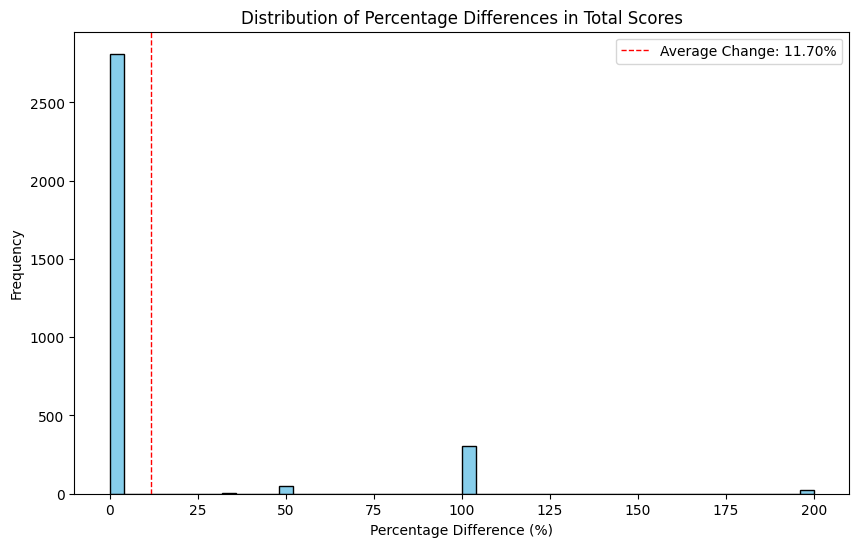

Average Percentage Change: 11.70%


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure no NaN or infinite values in the scores
final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['previous_total_score', 'total_score'])

# Calculate the percentage change between the new and previous total scores
final_df['percentage_difference'] = ((final_df['total_score'] - final_df['previous_total_score']) / final_df['previous_total_score']) * 100

# Remove any NaN or infinite values from percentage_difference
final_df = final_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['percentage_difference'])

# Calculate average percentage change
average_percentage_change = final_df['percentage_difference'].mean()

# Plot the percentage differences
plt.figure(figsize=(10, 6))
plt.hist(final_df['percentage_difference'], bins=50, color='skyblue', edgecolor='k')
plt.axvline(average_percentage_change, color='red', linestyle='dashed', linewidth=1, label=f'Average Change: {average_percentage_change:.2f}%')
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Differences in Total Scores')
plt.legend()
plt.show()

# Display the average percentage change
print(f"Average Percentage Change: {average_percentage_change:.2f}%")

In [108]:
# Filter the DataFrame for cases where the previous total score is greater than the new total score
discrepancies = final_df[final_df['previous_total_score'] > final_df['total_score']]

# Display the results
print(discrepancies[['total_score', 'sharp_turn_score', 'previous_total_score']])

Empty DataFrame
Columns: [total_score, sharp_turn_score, previous_total_score]
Index: []


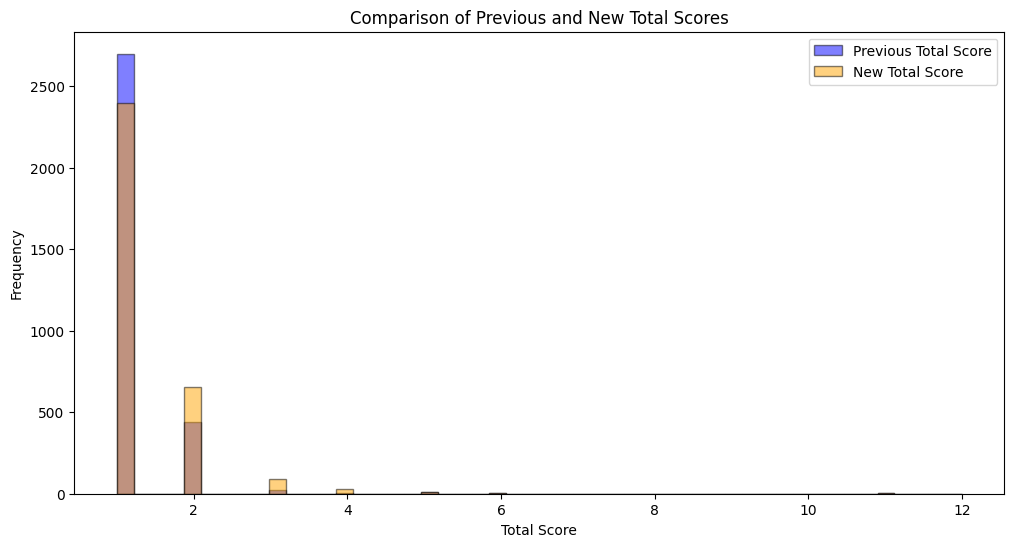

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(final_df['previous_total_score'], bins=50, alpha=0.5, label='Previous Total Score', edgecolor='k', color='blue')
plt.hist(final_df['total_score'], bins=50, alpha=0.5, label='New Total Score', edgecolor='k', color='orange')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Comparison of Previous and New Total Scores')
plt.legend()
plt.show()

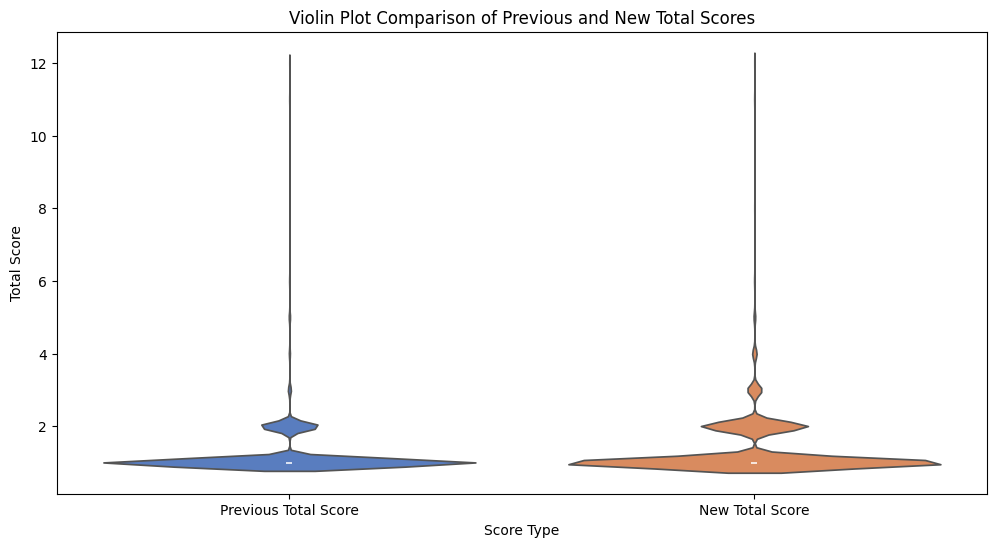

In [110]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.violinplot(data=final_df[['previous_total_score', 'total_score']], palette="muted")
plt.xlabel('Score Type')
plt.ylabel('Total Score')
plt.title('Violin Plot Comparison of Previous and New Total Scores')
plt.xticks([0, 1], ['Previous Total Score', 'New Total Score'])
plt.show()

In [111]:
print(final_df.dtypes)

_id_x                        object
id                            int64
time_collected               object
priority                      int64
sat                           int64
                             ...   
turn_severity                object
prolong_violations_score    float64
total_score                 float64
previous_total_score        float64
percentage_difference       float64
Length: 98, dtype: object


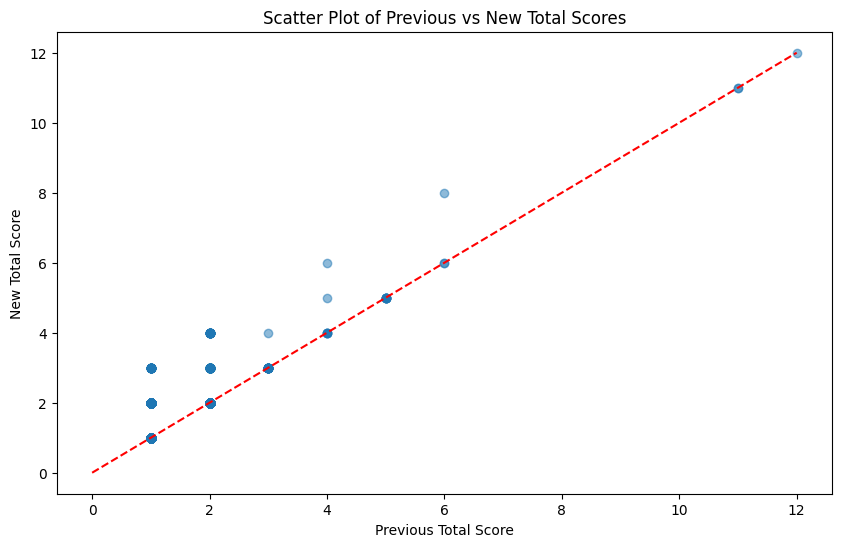

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['previous_total_score'], final_df['total_score'], alpha=0.5)
plt.plot([0, max(final_df['previous_total_score'])], [0, max(final_df['total_score'])], color='red', linestyle='--')  # Line of equality
plt.xlabel('Previous Total Score')
plt.ylabel('New Total Score')
plt.title('Scatter Plot of Previous vs New Total Scores')
plt.show()